In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
samples_per_class = 5000
no_of_classes = 2

In [4]:
noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 11/data/Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)


data_BBH_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 11/data/Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)

In [5]:
X = np.concatenate((noise, data_BBH), axis=0)

print(len(noise_df.index))
print(X)
print(X.shape)

5000
[[ 1.72726218e-18 -6.29223625e-19 -9.49644299e-19 ...  1.32852849e-18
  -5.66669186e-19  7.67277727e-19]
 [-1.82146884e-18 -2.17526967e-19 -1.96052229e-19 ... -3.06629064e-19
   8.92959376e-19  2.13581384e-18]
 [-2.23562421e-18  5.07750062e-20  2.26461631e-19 ... -1.67700752e-18
  -1.69574075e-19  1.18380041e-18]
 ...
 [ 1.36243078e-18 -9.65661397e-20  1.07372839e-18 ... -3.53820864e-19
   1.48567945e-18 -1.61555797e-23]
 [-1.49971993e-19  6.04602944e-20  2.27004762e-20 ... -1.38428545e-18
   1.50436025e-18 -1.25884796e-18]
 [-1.53482956e-18 -9.96109623e-19  7.26228379e-20 ...  1.31248288e-18
  -1.55513456e-18  9.60982345e-19]]
(10000, 16384)


In [6]:
# Alternate way of creating y for the dataset
 
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

# X *= 1e19
# print(X)

X *= 1e18
print(X)

# Z = np.zeros((2, 16384))
# Z[0] = X[0]
# Z[1] = X[5010]
# print(Z)

# np.savetxt("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 2/trial_3_noise.txt", Z[0])
# np.savetxt("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 2/trial_3_merged.txt", Z[1])

# print(X[0, 501])
# print(X[5010, 499])

[[ 1.72726218e+00 -6.29223625e-01 -9.49644299e-01 ...  1.32852849e+00
  -5.66669186e-01  7.67277727e-01]
 [-1.82146884e+00 -2.17526967e-01 -1.96052229e-01 ... -3.06629064e-01
   8.92959376e-01  2.13581384e+00]
 [-2.23562421e+00  5.07750062e-02  2.26461631e-01 ... -1.67700752e+00
  -1.69574075e-01  1.18380041e+00]
 ...
 [ 1.36243078e+00 -9.65661397e-02  1.07372839e+00 ... -3.53820864e-01
   1.48567945e+00 -1.61555797e-05]
 [-1.49971993e-01  6.04602944e-02  2.27004762e-02 ... -1.38428545e+00
   1.50436025e+00 -1.25884796e+00]
 [-1.53482956e+00 -9.96109623e-01  7.26228379e-02 ...  1.31248288e+00
  -1.55513456e+00  9.60982345e-01]]


In [8]:
X = np.expand_dims(X, axis=-1)
print(X.shape)
print(X)

(10000, 16384, 1)
[[[ 1.72726218e+00]
  [-6.29223625e-01]
  [-9.49644299e-01]
  ...
  [ 1.32852849e+00]
  [-5.66669186e-01]
  [ 7.67277727e-01]]

 [[-1.82146884e+00]
  [-2.17526967e-01]
  [-1.96052229e-01]
  ...
  [-3.06629064e-01]
  [ 8.92959376e-01]
  [ 2.13581384e+00]]

 [[-2.23562421e+00]
  [ 5.07750062e-02]
  [ 2.26461631e-01]
  ...
  [-1.67700752e+00]
  [-1.69574075e-01]
  [ 1.18380041e+00]]

 ...

 [[ 1.36243078e+00]
  [-9.65661397e-02]
  [ 1.07372839e+00]
  ...
  [-3.53820864e-01]
  [ 1.48567945e+00]
  [-1.61555797e-05]]

 [[-1.49971993e-01]
  [ 6.04602944e-02]
  [ 2.27004762e-02]
  ...
  [-1.38428545e+00]
  [ 1.50436025e+00]
  [-1.25884796e+00]]

 [[-1.53482956e+00]
  [-9.96109623e-01]
  [ 7.26228379e-02]
  ...
  [ 1.31248288e+00]
  [-1.55513456e+00]
  [ 9.60982345e-01]]]


In [9]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=1) #, random_state=1

In [10]:
print(X_train.shape, y_train.shape)

(9999, 16384, 1) (9999, 2)


In [11]:
model = Sequential()

model.add(Conv1D(16, 16, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(32, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(64, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(7808))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5) # tf.nn.sigmoid_cross_entropy_with_logits

Epoch 1/5
79/79 [==============================] - 21s 143ms/step - loss: 0.6061 - accuracy: 0.7365
Epoch 2/5
79/79 [==============================] - 11s 143ms/step - loss: 0.0049 - accuracy: 0.9984
Epoch 3/5
79/79 [==============================] - 11s 143ms/step - loss: 0.0010 - accuracy: 0.9996
Epoch 4/5
79/79 [==============================] - 11s 143ms/step - loss: 4.9740e-04 - accuracy: 0.9999
Epoch 5/5
79/79 [==============================] - 11s 143ms/step - loss: 6.9783e-05 - accuracy: 1.0000


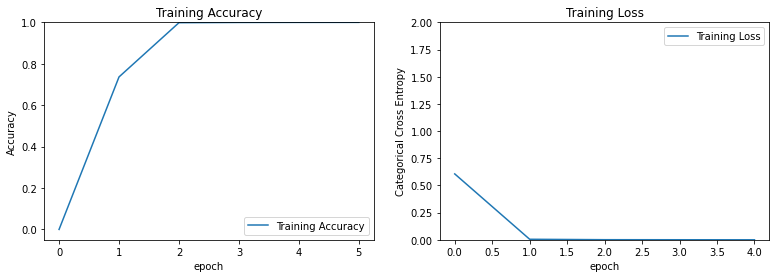

In [13]:
acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
# model.save("/content/gdrive/MyDrive/GW_SOP/Code/debugging/Test 11/data/weights_trial_2.h5")